# Comparison: Classical ML vs Deep Learning

This notebook compares the two approaches across multiple dimensions:
- Accuracy
- Training time
- Overfitting behavior
- Interpretability
- Resource requirements


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-v0_8-darkgrid')


In [2]:
# Load results
with open('../results_classical.pkl', 'rb') as f:
    results_classical = pickle.load(f)

with open('../results_deep.pkl', 'rb') as f:
    results_deep = pickle.load(f)

# Create comparison dataframe
comparison_data = {
    'Approach': ['Classical ML (TF-IDF + LR)', 'Deep Learning (NN)'],
    'Accuracy': [results_classical['accuracy'], results_deep['accuracy']],
    'Training Time (s)': [results_classical['training_time'], results_deep['training_time']],
    'Total Time (s)': [results_classical['total_time'], results_deep['training_time']]
}

df_comparison = pd.DataFrame(comparison_data)
print("COMPARISON SUMMARY")
print("=" * 60)
print(df_comparison.to_string(index=False))


2025-12-14 06:27:47.776203: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-14 06:27:47.831055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-14 06:27:49.570326: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-14 06:27:49.977489: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


COMPARISON SUMMARY
                  Approach  Accuracy  Training Time (s)  Total Time (s)
Classical ML (TF-IDF + LR)    0.8727           0.166078        3.727992
        Deep Learning (NN)    0.8484         315.326073      315.326073


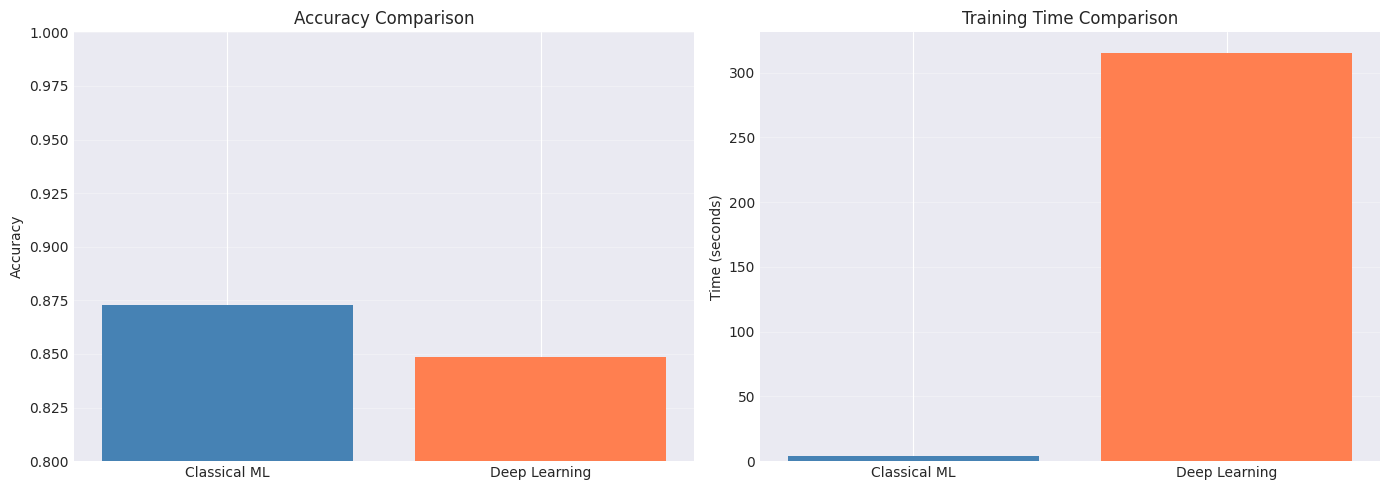

In [3]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].bar(['Classical ML', 'Deep Learning'], 
            [results_classical['accuracy'], results_deep['accuracy']],
            color=['steelblue', 'coral'])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylim([0.8, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')

# Training time comparison
axes[1].bar(['Classical ML', 'Deep Learning'],
            [results_classical['total_time'], results_deep['training_time']],
            color=['steelblue', 'coral'])
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Training Time Comparison')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Key Takeaways

### When to Use Classical ML (TF-IDF + Logistic Regression):
1. **Limited Data**: Works well with smaller datasets
2. **Interpretability Required**: Need to understand which features matter
3. **Fast Training**: Quick iteration and experimentation
4. **CPU-only Environment**: No GPU required
5. **Baseline Model**: Good starting point for comparison

### When to Use Deep Learning:
1. **Large Datasets**: Benefits from more data
2. **Complex Patterns**: Need to capture non-linear relationships
3. **State-of-the-art Performance**: Pushing accuracy boundaries
4. **GPU Available**: Can leverage parallel computation
5. **End-to-end Learning**: Want learned representations

### Trade-offs:
- **Classical ML**: Faster, interpretable, but may plateau in performance
- **Deep Learning**: More powerful, but requires more resources and data
